# ITMAL Exercise

REVISIONS| |
---------| |
2018-0318| CEF, initial.
2018-0321| CEF, finally got moon fit to work, it is rather prone to flat-plateau gradient problems.
2018-0321| CEF, major revision.
2018-0323| CEF, minor updated and spell checked.

## Multi-layers Perceptrons (MLP)

By stacking up neurons in layers we can create an MLP.

<img src="Figs/mlpfully_simple.png" style="width:300px">
<small><em>
    <center>An example of a fully-connected three-layer MLP.</center> 
</xsmall></center>
</em></small>


## Keras Multi-Layer Perceptrons: the `Sequential` model

In this exercise well will try to build fully-connected MLP, via the `keras` API.  Once Keras is installed (good luck), you can use it as front-end to Tensorflow and its highly optimized MLP implementations.

In Keras-terms an MLP is a `Sequential` model. This model can be made out of fully-connected, or in Keras terms `Dense`, layers. Later we see other types of layers that are not fully-connected, like convolutional 2D layers, Conv2D.

OPTIONAL: more info on Keras' `Sequential` model

> https://keras.io/getting-started/sequential-model-guide/

## Keras Multi-Layer Perceptrons on Moon-data

Below are some cells for running a Keras `Sequential` model on the moon-data.

The first cell setup the keras model, load the data and initiates the fit.

The second and third cell plots various aspects of the training, using the _history_ from the Keras model.

Now, many Keras functions are not as well documented compared to Scikit-learn and even though many elements seem to be equal in the Keras and Sckikit-learn domain, they are not 100% equal, for example, Keras comes with some metrics like

> `categorical_accuracy` and `binary_accuracy`

but has no `F1` or `precision` or `recall`.

### Qa Using a Keras MLP on the Moon-data

Run the three cells below, and inspect the plots. I get an accuracy of 0.96 using the setup below.

Now, change the optimizer from `Adam` to our well-known `SDG` method, using

> `optimizer = SGD(lr=0.1)`

instead of `ADAM(lr=0.1)`.

Does it still produce a good score, in form of the `categorical_accuracy`? My accuracy now drops to 0.88, and the new decision boundary looks like a straight line!

Find a way to make the `SDG` produce a result similar to the `ADAM` optimizer: Maybe you need to crack up the number of `EPOCHS` during training to get a better result using the `SGD` optimizer? 

In [2]:
# TODO: Qa..run Keras on Moon, cell 1
import sys,os
sys.path.append(os.path.abspath('')+'/..')

from libitmal import kernelfuns as itmalkernelfuns
#itmalkernelfuns.EnableGPU()                              
#itmalkernelfuns.DisableGPU()   

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn import datasets

import numpy as np
from time import time

np.random.seed(42)

# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=2, activation="softmax"))

#optimizer = SGD(lr=0.1)
optimizer = Adam(lr=0.1)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Make data
X, y = datasets.make_moons(2000, noise=0.20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Train
VERBOSE     = 0
EPOCHS      = 35

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")

Using TensorFlow backend.


OK, training time=2.1


Training time: 2.1 sec
Test loss:     0.0939762233197689
Test accuracy: 0.9666666666666667
All scores in history: [0.0939762233197689, 0.9666666666666667, 0.026033238787204028, 0.052539484848578774]


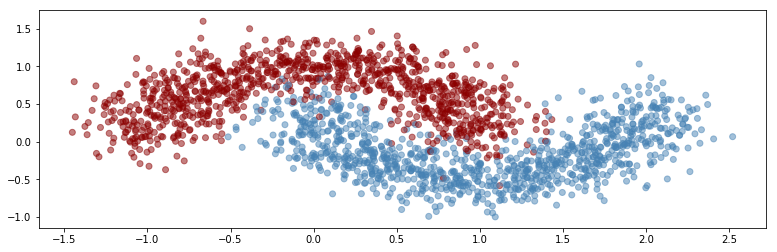

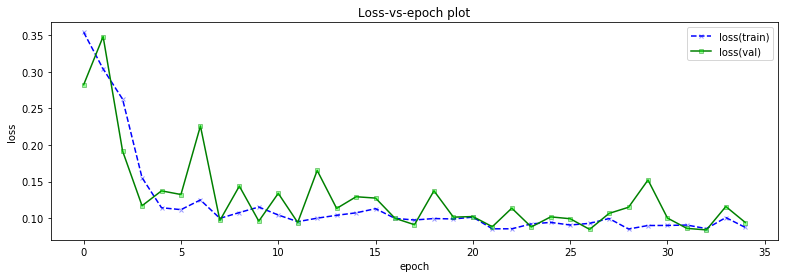

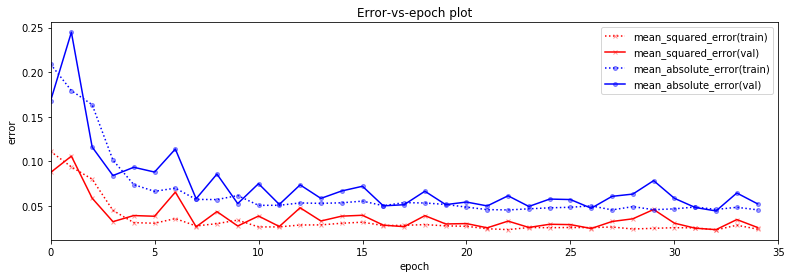

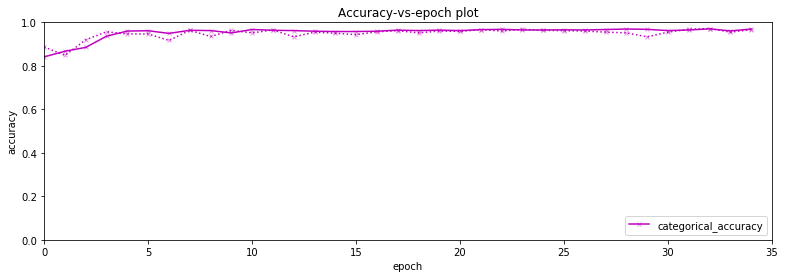

In [3]:
# TODO: Qa..run Keras on Moon, cell 2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot org data
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 1)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors, alpha=.5)
plt.show()

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

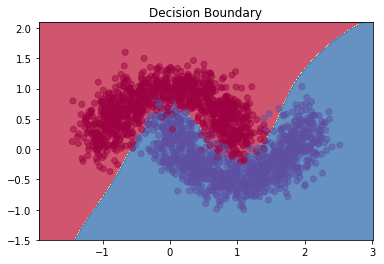

In [4]:
# TODO: Qa..run Keras on Moon, cell 3

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=.5)

# Predict and plot decision boundary
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))
plt.title("Decision Boundary")
plt.show()

### Qb  Keras and Classification Categories

It is customary practice to convert both binary and multiclass classification labels to a one-hot encoding. 

Explain one-hot encoding and the 

```python
y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)
```
and the used categorical metric (compare it to our well know accuracy function),

```python
metrics=['categorical_accuracy',..
```

NOTE: Keras'  `categorical_accuracy` is implemented as
```
def categorical_accuracy(y_true, y_pred):
    return K.cast(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)), K.floatx())

```
but also used internal TensorFlow tensors instead of `numpy.arrays` and these are right now difficult to work with directly.

In [ ]:
# TODO: Qb..explain in text or create your own categorical_accuracy fun..

### Qc Optimize the Keras Model

Now, try to optimize the model by 

* increasing/decreasing the number of epochs,
* adding more neurons per layer, 
* adding whole new layers,
* changing the activation functions in the layers,
* changing the output activation from `activation="softmax"` to something else,

Comment on your changes, and relate the resulting accuracy, accuracy-vs-epochs, loss-vs-epoch and decision boundary plots to your changes, ie. try to get a feeling of what happens when you modify the model hyperparameters. 

NOTE: Many times the model seems to get stuck on an extreme flat loss plateau, and the decision boundary displays just a 'dum' straight line through the moons!

OPTIONAL: should the moon data be standardized or normalized to say range [-1;1] in both $\mathbf x$-dimensions? Will it help, or is the data OK as-is?

In [ ]:
# TODO: Qc..

### [OPTIONAL] Qd Cross Entropy

Explain loss='categorical_crossentropy. What is cross-entropy, and how is it used as a norm/distance? Why choose cross-entropy instead of MSE or MAE?


In [ ]:
# TODO: Qd in text..